In [1]:
import omicverse as ov
ov.utils.ov_plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.7, Tutorials: https://omicverse.readthedocs.io/
Dependency error: (pydeseq2 0.4.12 (/mnt/home/yihanzhao/miniconda3/envs/zyh/lib/python3.10/site-packages), Requirement.parse('pydeseq2<=0.4.0,>=0.3'))


In [3]:
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import gc
import os

In [4]:
rb_soft=sc.read_h5ad('/mnt/home/yihanzhao/RB/data_new/rb_soft_via.h5ad')
rb_soft

AnnData object with n_obs × n_vars = 277 × 2000
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [5]:
#pp
rb_pp=rb_soft[rb_soft.obs.celltype == 'P-p', :]
rb_pp

View of AnnData object with n_obs × n_vars = 20 × 2000
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [6]:
#Cone
rb_cone=rb_soft[rb_soft.obs.celltype == 'Cone', :]
rb_cone

View of AnnData object with n_obs × n_vars = 38 × 2000
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [8]:
#Cone
rb_cone_tumor=rb_soft[rb_soft.obs.celltype == 'Cone-T', :]
rb_cone_tumor

View of AnnData object with n_obs × n_vars = 36 × 2000
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [9]:
import anndata
test1=anndata.concat([rb_pp, rb_cone], join="inner")
test1

AnnData object with n_obs × n_vars = 58 × 2000
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    obsm: 'X_umap', 'scaled|original|X_pca'
    layers: 'lognorm', 'scaled'

In [10]:
dds=ov.bulk.pyDEG(test1.to_df().T)

In [11]:
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [12]:
treatment_groups=rb_pp.obs.index.tolist()

In [13]:
control_groups=rb_cone.obs.index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')

In [14]:
result.sort_values('qvalue').head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
CDK1,3.181027e-09,2.873642e-07,3.046265,8.497433,6.541567,2.851400,1.511671,1.607041,1.607041,0.304627,sig
C5orf34,2.357319e-09,2.873642e-07,5.055810,8.627582,6.541567,0.834713,-0.260647,2.337942,2.337942,0.505581,sig
PHLDB2,3.181027e-09,2.873642e-07,8.135468,8.497433,6.541567,0.318374,-1.651204,3.024225,3.024225,0.813547,sig
NDC80,2.879372e-09,2.873642e-07,5.260211,8.540702,6.541567,2.106106,1.074578,2.395121,2.395121,0.526021,sig
AURKB,3.879417e-09,2.873642e-07,5.643111,8.411234,6.541567,1.600919,0.678901,2.496491,2.496491,0.564311,sig


In [15]:
import numpy as np

In [16]:
result['log(padj)'] = -np.log10(result['pvalue'])
result['sig'] = 'normal'
result.loc[(result.log2FC> 1.5 )&(result.pvalue < 0.1),'sig'] = 'up'
result.loc[(result.log2FC< -1.5 )&(result.pvalue < 0.1),'sig'] = 'down'

result.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,log(padj)
RPS27,1.745270e-01,2.256329e-01,0.982414,0.758137,0.646598,7.424545,2.892303,-0.025597,0.025597,0.098241,normal,0.758137
RCVRN,4.657349e-08,7.334409e-07,0.812499,7.331861,6.134635,6.937709,2.794459,-0.299562,0.299562,0.081250,normal,7.331861
HSP90AA1,1.906281e-01,2.439259e-01,0.989516,0.719813,0.612742,7.146377,2.837212,-0.015206,0.015206,0.098952,normal,0.719813
TMSB4X,1.053301e-01,1.461902e-01,1.077004,0.977448,0.835082,6.832695,2.772455,0.107023,0.107023,0.107700,normal,0.977448
TUBA1B,8.887913e-02,1.268796e-01,1.044753,1.051200,0.896608,6.799891,2.765512,0.063162,0.063162,0.104475,normal,1.051200


In [17]:
import gseapy as gp

In [18]:
gseada=result.loc[result['sig']!='normal']
gseada['fcsign']=-np.sign(gseada['log2FC'])
gseada['logp']=-np.log10(gseada['pvalue'])
gseada['metric']=gseada['logp']/gseada['fcsign']
gseada.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,log(padj),fcsign,logp,metric
MKI67,2.879372e-09,2.873642e-07,3.561755,8.540702,6.541567,3.162397,1.661018,1.832588,1.832588,0.356175,up,8.540702,-1.0,8.540702,-8.540702
MPP4,1.512645e-06,1.100106e-05,0.286292,5.820263,4.958566,2.097335,1.068557,-1.804438,1.804438,0.028629,down,5.820263,1.0,5.820263,5.820263
TPX2,1.030299e-08,2.902251e-07,2.924050,7.987037,6.537265,2.895072,1.533599,1.547968,1.547968,0.292405,up,7.987037,-1.0,7.987037,-7.987037
CDK1,3.181027e-09,2.873642e-07,3.046265,8.497433,6.541567,2.851400,1.511671,1.607041,1.607041,0.304627,up,8.497433,-1.0,8.497433,-8.497433
UBE2C,1.248659e-08,3.285944e-07,3.212562,7.903556,6.483340,2.868622,1.520358,1.683724,1.683724,0.321256,up,7.903556,-1.0,7.903556,-7.903556


In [19]:
gseada=gseada.sort_values(by=['metric'],ascending=False)
gseada.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,log(padj),fcsign,logp,metric
FAM107A,2.208867e-08,4.373994e-07,0.246459,7.655830,6.359122,1.454044,0.540071,-2.020581,2.020581,0.024646,down,7.655830,1.0,7.655830,7.655830
PDE6B,8.824330e-08,1.184474e-06,0.344529,7.054318,5.926475,1.670579,0.740348,-1.537301,1.537301,0.034453,down,7.054318,1.0,7.054318,7.054318
SORBS2,2.562184e-07,2.655113e-06,0.345973,6.591390,5.575917,1.240147,0.310512,-1.531270,1.531270,0.034597,down,6.591390,1.0,6.591390,6.591390
C20orf141,2.562184e-07,2.655113e-06,0.038069,6.591390,5.575917,0.326518,-1.614766,-4.715230,4.715230,0.003807,down,6.591390,1.0,6.591390,6.591390
MREG,3.325121e-07,3.244021e-06,0.272587,6.478193,5.488916,0.585376,-0.772565,-1.875210,1.875210,0.027259,down,6.478193,1.0,6.478193,6.478193


In [20]:
import pandas as pd

In [21]:
rnk=pd.DataFrame()
rnk['gene_name']=gseada.index
rnk['rnk']=gseada['metric'].values
k=1
total=0
for i in range(len(rnk)):
    if rnk.loc[i,'rnk']==np.inf: 
        total+=1
for i in range(len(rnk)):
    if rnk.loc[i,'rnk']==np.inf: 
        rnk.loc[i,'rnk']=300+(total-k)
        k+=1
    elif rnk.loc[i,'rnk']==-np.inf: 
        rnk.loc[i,'rnk']=-(300+k)
        k+=1

rnk.head()

,gene_name,rnk
0,FAM107A,7.655830
1,PDE6B,7.054318
2,SORBS2,6.591390
3,C20orf141,6.591390
4,MREG,6.478193


In [22]:
for i in range(len(rnk)):
    rnk.loc[i,'gene_name']=rnk.loc[i,'gene_name'].upper()
rnk.head()

,gene_name,rnk
0,FAM107A,7.655830
1,PDE6B,7.054318
2,SORBS2,6.591390
3,C20ORF141,6.591390
4,MREG,6.478193


In [23]:
names = gp.get_library_name()

In [26]:
pre_res = gp.prerank(rnk=rnk, gene_sets=pathway_dict,
                     processes=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='/hy-tmp/KEGG_gsea/bio_pro', format='png', seed=6)

In [27]:
pre_res.res2d.sort_index()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Cell cycle,-0.611750,-1.968766,0.000000,0.000000,124,16,PLK1;SMC1B;CDK6;E2F2;ORC1;BUB1;CDC25B;CCNA1;TT...,E2F2;ORC1;BUB1;CDC25B;CCNA1;TTK;PKMYT1;CDC20;C...
Human papillomavirus infection,-0.261610,-0.900682,0.641304,0.636872,331,19,VTN;HLA-F;IRF9;ATP6V0D2;EGF;TNR;PPP2R5A;WNT11;...,LAMA1;CREB5;FAS;ITGA1;FZD1;CCNA1;TERT;CCNA2
MAPK signaling pathway,0.189911,0.946538,0.615385,0.571429,294,18,CACNA2D4;IRAK4;MEF2C;CACNA1A;EGF;PDGFC;EPHA2;A...,CACNA2D4;IRAK4;MEF2C;CACNA1A;EGF;PDGFC;EPHA2;A...
Pathways in cancer,-0.461157,-1.657084,0.000000,0.012570,531,23,AGT;EGF;MITF;WNT11;FZD5;PLCB1;NFKB2;CDK6;FGFR3...,CDK6;FGFR3;FGF2;KITLG;LAMA1;FAS;CXCR4;E2F2;RAD...


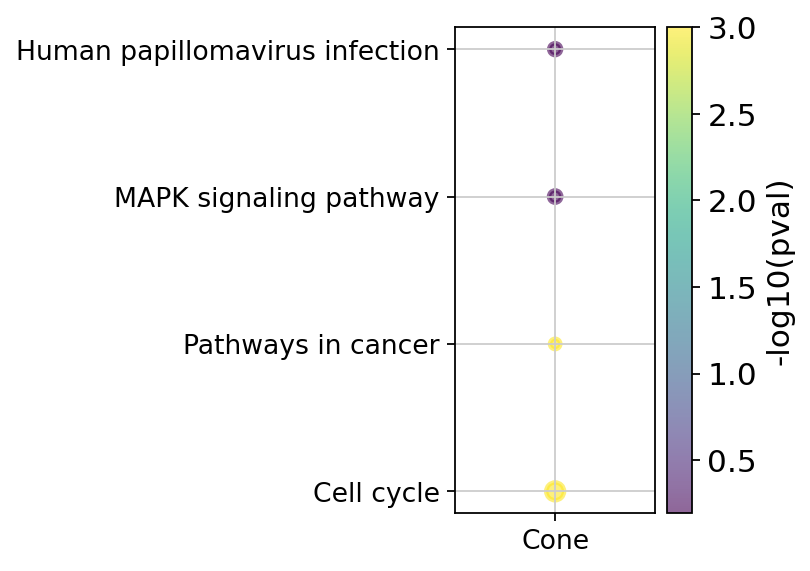

In [42]:
sc_data=pd.read_csv(r'/hy-tmp/KEGG_gsea/bio_pro/gseapy.prerank.gene_sets.report.csv')
sc_data['logp']=-np.log10(sc_data['pval']+0.001)
sc_data['com']=sc_data['matched_size']/sc_data['geneset_size']
sc_data.head()

pp=plt.figure(figsize=(2,4))
a=pp.add_subplot(1,1,1)

plt.scatter(np.zeros(len(sc_data))+1,sc_data['Term'],s=sc_data['com']*500,alpha=0.6,linewidth=2,
            c=sc_data['logp'],
            cmap='viridis')

plt.xticks([1], ['Cone'])


plt.yticks(fontsize=12)
plt.xticks(fontsize=12)


plt.xlim(0.5, 1.5)

plt.colorbar(label='-log10(pval)')

plt.show()


In [43]:
import anndata
test2=anndata.concat([rb_cone, rb_cone_tumor], join="inner")
test2

AnnData object with n_obs × n_vars = 74 × 2000
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'pt_via'
    obsm: 'X_umap', 'scaled|original|X_pca'
    layers: 'lognorm', 'scaled'

In [44]:
dds=ov.bulk.pyDEG(test2.to_df().T)

In [45]:
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [46]:
treatment_groups=rb_cone.obs.index.tolist()

In [47]:
control_groups=rb_cone_tumor.obs.index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')

In [48]:
result.sort_values('qvalue').head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
FILIP1L,2.878448e-13,5.756897e-10,0.360886,12.540842,9.239812,2.131688,1.091996,-1.470387,1.470387,0.036089,sig
CITED2,9.292044e-11,9.292044e-08,5.230421,10.031889,7.031889,0.708176,-0.497821,2.386927,2.386927,0.523042,sig
C8orf88,4.685162e-10,1.338618e-07,0.216308,9.329275,6.873343,0.256986,-1.960238,-2.208839,2.208839,0.021631,sig
PHLDA1,4.685162e-10,1.338618e-07,0.335925,9.329275,6.873343,1.561886,0.643289,-1.573790,1.573790,0.033592,sig
CNTN4,3.312977e-10,1.338618e-07,0.216329,9.479782,6.873343,0.226766,-2.140726,-2.208701,2.208701,0.021633,sig


In [49]:
result['log(padj)'] = -np.log10(result['pvalue'])
result['sig'] = 'normal'
result.loc[(result.log2FC> 1.5 )&(result.pvalue < 0.05),'sig'] = 'up'
result.loc[(result.log2FC< -1.5 )&(result.pvalue < 0.05),'sig'] = 'down'

result.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,log(padj)
SAMD11,0.004605,0.012916,2.048494,2.336808,1.888868,1.260799,0.334339,1.034564,1.034564,0.204849,normal,2.336808
HES4,0.611247,0.676159,1.085375,0.213783,0.169951,1.972405,0.979956,0.118194,0.118194,0.108538,normal,0.213783
B3GALT6,0.179911,0.250921,1.237245,0.744943,0.600462,0.467012,-1.098468,0.307131,0.307131,0.123725,normal,0.744943
ATAD3A,0.000561,0.002762,0.682514,3.251211,2.558707,0.962994,-0.054401,-0.551069,0.551069,0.068251,normal,3.251211
FNDC10,0.004451,0.012574,0.675695,2.351527,1.900530,0.423707,-1.238861,-0.565556,0.565556,0.067570,normal,2.351527


In [50]:
gseada=result.loc[result['sig']!='normal']
gseada['fcsign']=-np.sign(gseada['log2FC'])
gseada['logp']=-np.log10(gseada['pvalue'])
gseada['metric']=gseada['logp']/gseada['fcsign']
gseada.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,log(padj),fcsign,logp,metric
ESPN,0.000550,0.002741,23.574440,3.259916,2.562030,0.272949,-1.873299,4.559152,4.559152,2.357444,up,3.259916,-1.0,3.259916,-3.259916
PADI2,0.031387,0.060533,16.412754,1.503257,1.218006,0.053392,-4.227221,4.036746,4.036746,1.641275,up,1.503257,-1.0,1.503257,-1.503257
PLA2G5,0.002505,0.007940,17.726919,2.601176,2.100176,0.401902,-1.315083,4.147870,4.147870,1.772692,up,2.601176,-1.0,2.601176,-2.601176
IFI6,0.000900,0.003829,5.462923,3.045878,2.416946,0.536339,-0.898783,2.449673,2.449673,0.546292,up,3.045878,-1.0,3.045878,-3.045878
SLC6A9,0.007317,0.018270,4.112401,2.135666,1.738269,0.147777,-2.758508,2.039981,2.039981,0.411240,up,2.135666,-1.0,2.135666,-2.135666


In [51]:
gseada=gseada.sort_values(by=['metric'],ascending=False)
gseada.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig,log(padj),fcsign,logp,metric
CNTN4,3.312977e-10,1.338618e-07,0.216329,9.479782,6.873343,0.226766,-2.140726,-2.208701,2.208701,0.021633,down,9.479782,1.0,9.479782,9.479782
LINC02588,3.551558e-10,1.338618e-07,0.253480,9.449581,6.873343,0.284620,-1.812890,-1.980059,1.980059,0.025348,down,9.449581,1.0,9.449581,9.449581
LINC01795,4.685162e-10,1.338618e-07,0.200050,9.329275,6.873343,0.261034,-1.937690,-2.321565,2.321565,0.020005,down,9.329275,1.0,9.329275,9.329275
C8orf88,4.685162e-10,1.338618e-07,0.216308,9.329275,6.873343,0.256986,-1.960238,-2.208839,2.208839,0.021631,down,9.329275,1.0,9.329275,9.329275
PHLDA1,4.685162e-10,1.338618e-07,0.335925,9.329275,6.873343,1.561886,0.643289,-1.573790,1.573790,0.033592,down,9.329275,1.0,9.329275,9.329275


In [52]:
rnk=pd.DataFrame()
rnk['gene_name']=gseada.index
rnk['rnk']=gseada['metric'].values
k=1
total=0
for i in range(len(rnk)):
    if rnk.loc[i,'rnk']==np.inf: 
        total+=1
for i in range(len(rnk)):
    if rnk.loc[i,'rnk']==np.inf: 
        rnk.loc[i,'rnk']=300+(total-k)
        k+=1
    elif rnk.loc[i,'rnk']==-np.inf: 
        rnk.loc[i,'rnk']=-(300+k)
        k+=1

rnk.head()

,gene_name,rnk
0,CNTN4,9.479782
1,LINC02588,9.449581
2,LINC01795,9.329275
3,C8orf88,9.329275
4,PHLDA1,9.329275


In [53]:
for i in range(len(rnk)):
    rnk.loc[i,'gene_name']=rnk.loc[i,'gene_name'].upper()
rnk.head()

,gene_name,rnk
0,CNTN4,9.479782
1,LINC02588,9.449581
2,LINC01795,9.329275
3,C8ORF88,9.329275
4,PHLDA1,9.329275


In [54]:
pre_res = gp.prerank(rnk=rnk, gene_sets='GO_Biological_Process_2023',
                     processes=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='/hy-tmp/GO_gsea2/bio_pro', format='png', seed=6)

In [55]:
pre_res.res2d.sort_index()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Positive Regulation Of DNA-templated Transcription (GO:0045893),0.274009,0.995261,0.423077,0.427184,1243,20,SOX1;CTCFL;ASXL3;HOXB2;DLX5;FOSL1;EDN1;CDH1;EG...,SOX1;CTCFL;ASXL3
Regulation Of DNA-templated Transcription (GO:0006355),0.268521,1.019380,0.403509,0.597087,1922,24,SOX1;CTCFL;ETV7;SOX6;DLX6;OVOL1;EBF1;DLX5;FOSL...,SOX1;CTCFL;ETV7;SOX6;DLX6;OVOL1;EBF1;DLX5;FOSL...
Regulation Of Gene Expression (GO:0010468),-0.353784,-1.395719,0.074074,0.077320,1127,23,SOX1;CTCFL;SOX6;CDH1;EGF;PPARGC1B;PARP9;TDRD7;...,MSR1;IFI16;REST;TAPBP;SFMBT2;ALPK2;MBNL2;ZNF53...
Regulation Of Transcription By RNA Polymerase II (GO:0006357),0.300536,1.238327,0.254902,0.640777,2028,29,SOX1;CTCFL;ASXL3;ETV7;SOX6;HOXB2;DLX6;OVOL1;EB...,SOX1;CTCFL;ASXL3;ETV7;SOX6;HOXB2;DLX6;OVOL1;EB...


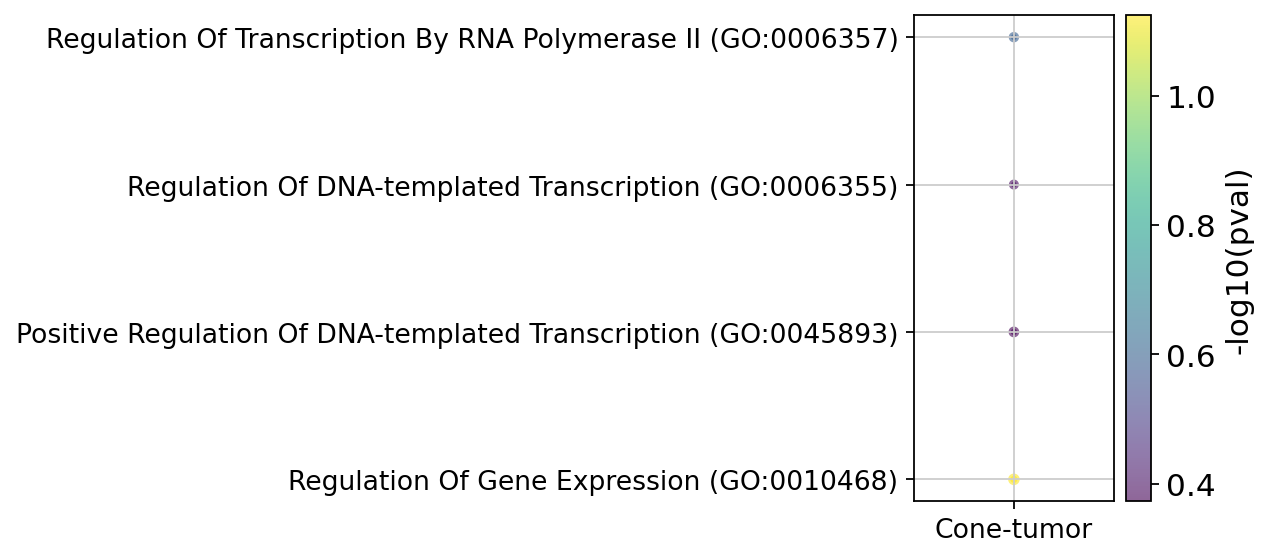

In [57]:
sc_data=pd.read_csv(r'/hy-tmp/GO_gsea2/bio_pro/gseapy.prerank.gene_sets.report.csv')
sc_data['logp']=-np.log10(sc_data['pval']+0.001)
sc_data['com']=sc_data['matched_size']/sc_data['geneset_size']
sc_data.head()

pp=plt.figure(figsize=(2,4))
a=pp.add_subplot(1,1,1)

plt.scatter(np.zeros(len(sc_data))+1,sc_data['Term'],s=sc_data['com']*500,alpha=0.6,linewidth=2,
            c=sc_data['logp'],
            cmap='viridis')

plt.xticks([1], ['Cone-tumor'])


plt.yticks(fontsize=12)
plt.xticks(fontsize=12)


plt.xlim(0.5, 1.5)


plt.colorbar(label='-log10(pval)')

plt.show()

In [58]:
pre_res = gp.prerank(rnk=rnk, gene_sets='GO_Molecular_Function_2023',
                     processes=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='/hy-tmp/GO_mole_gsea2/bio_pro', format='png', seed=6)

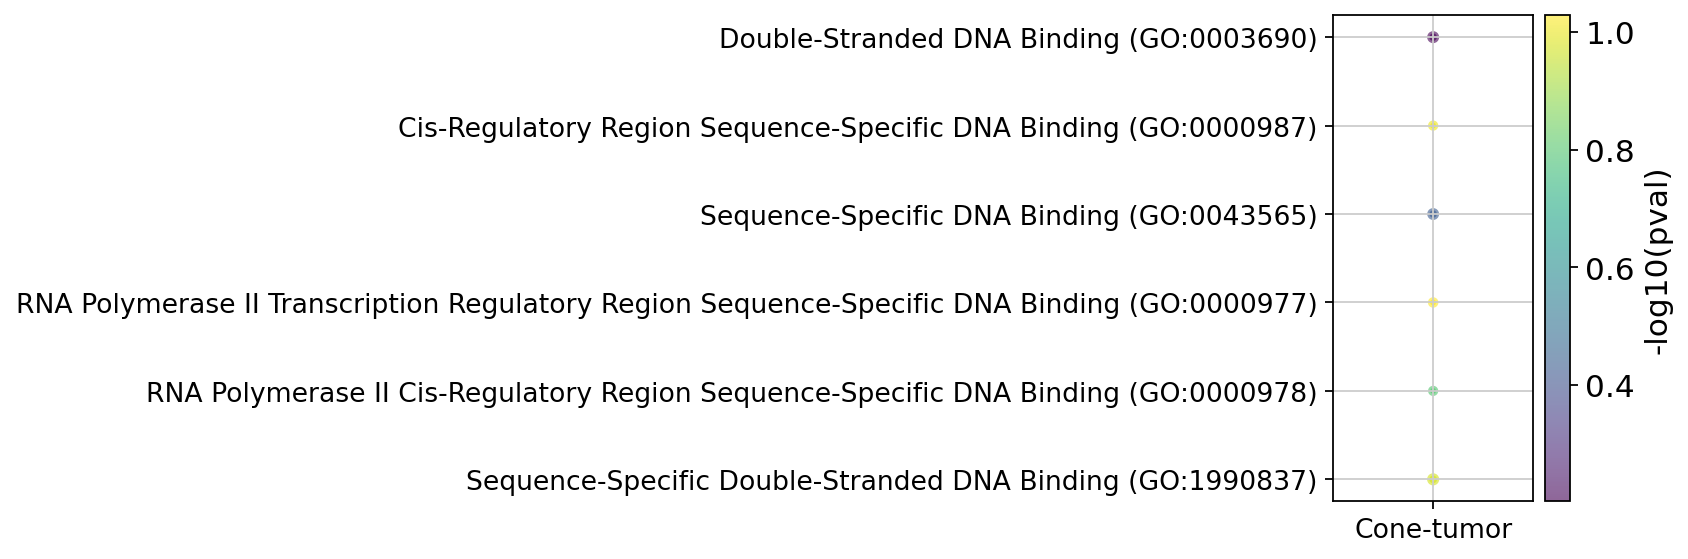

In [59]:
sc_data=pd.read_csv(r'/hy-tmp/GO_mole_gsea2/bio_pro/gseapy.prerank.gene_sets.report.csv')
sc_data['logp']=-np.log10(sc_data['pval']+0.001)
sc_data['com']=sc_data['matched_size']/sc_data['geneset_size']
sc_data.head()

pp=plt.figure(figsize=(2,4))
a=pp.add_subplot(1,1,1)

plt.scatter(np.zeros(len(sc_data))+1,sc_data['Term'],s=sc_data['com']*500,alpha=0.6,linewidth=2,
            c=sc_data['logp'],
            cmap='viridis')

plt.xticks([1], ['Cone-tumor'])


plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.xlim(0.5, 1.5)

plt.colorbar(label='-log10(pval)')

plt.show()